In [3]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

In [5]:
data = pd.read_csv('bike_sharing_data.txt')
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


# Visualizing Data

Text(0.5, 1.0, 'Profit in $10000s and Population in 10000')

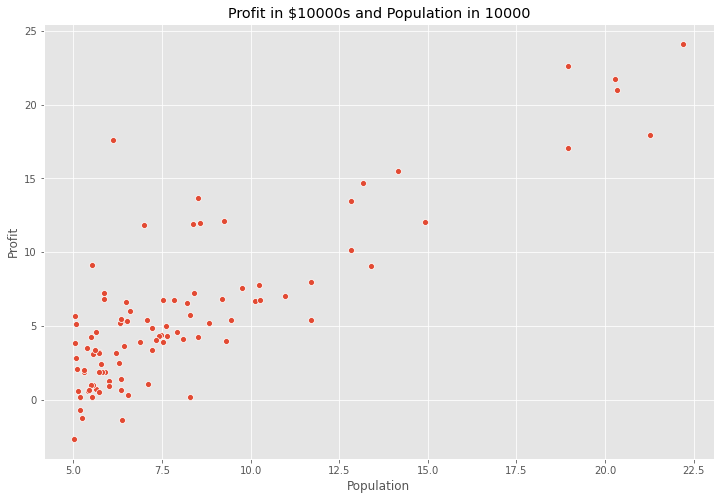

In [7]:
ax = sns.scatterplot(x="Population", y= "Profit", data = data)
ax.set_title("Profit in $10000s and Population in 10000")

# Computing the cost J(Theta)

In [8]:
def cost_function(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    error = (y_pred - y) ** 2
    
    return 1 / (2 * m) * np.sum(error)

In [9]:
m = data.Population.values.size
X = np.append(np.ones((m, 1)), data.Population.values.reshape(m, 1), axis =1)
y = data.Profit.values.reshape(m, 1)
theta = np.zeros((2,1))

cost_function(X, y, theta)

32.072733877455676

# Gradient Descent (Minimize the cost function)

In [14]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(), (y_pred - y))
        theta -= alpha * 1/m * error
        costs.append(cost_function(X, y, theta))
    return theta, costs
    

In [15]:
#checking whether it is minimizing or not
theta, costs = gradient_descent(X, y, theta, alpha = 0.01, iterations = 2000)
print("h(x) = {} + {}x1". format(str(round(theta[0, 0], 2)),
                                str(round(theta[1,0 ], 2))))

h(x) = -3.79 + 1.18x1


# Visualizing the cost function

In [19]:
from mpl_toolkits.mplot3d import Axes3D

#list of uniform numbers from positive end to negative end

theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)
cost_values = np.zeros((len(theta_0), len(theta_1)))

#iterate thorugh space of theta zero and one
for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_function(X, y, t)
        

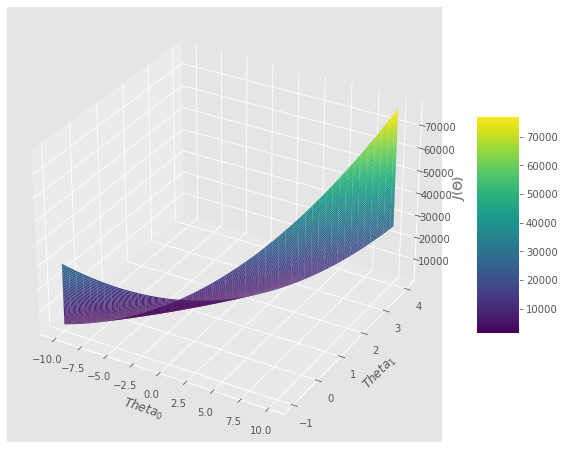

In [20]:
fig = plt.figure(figsize = (12, 8))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = 'viridis')
fig.colorbar(surf, shrink = 0.5, aspect = 5)

plt.xlabel("$Theta_0$")
plt.ylabel("$Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.view_init(30, 300)

plt.show()

# Plotting the convergence

Text(0.5, 1.0, 'Vlaues of the cost function over iterations of gradient descent')

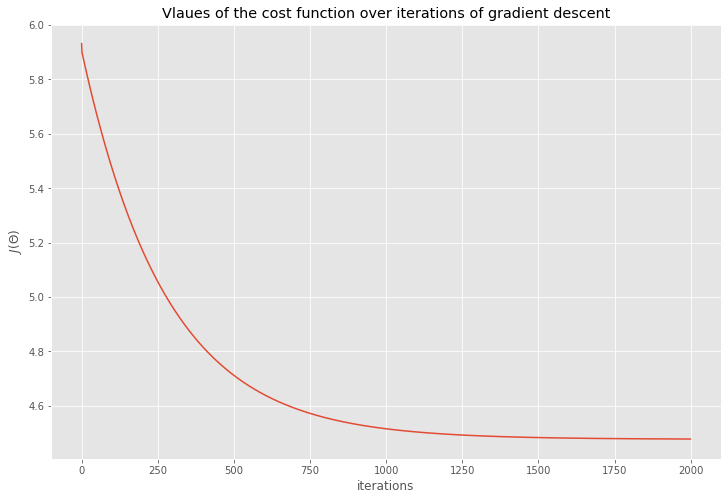

In [23]:
#Plot j(theta) against number of iterations of gradient descent

plt.plot(costs)
plt.xlabel("iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Vlaues of the cost function over iterations of gradient descent")

# Training Data with Linear Regression fit

In [22]:
theta

array([[-3.78826273],
       [ 1.18223228]])

Text(0.5, 1.0, 'Linear Regression Fit')

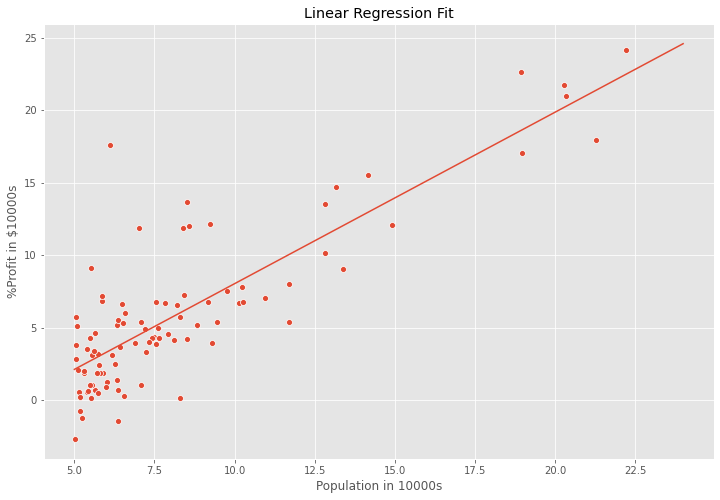

In [24]:
theta = np.squeeze(theta)
sns.scatterplot(x="Population", y= "Profit", data = data) 

x_value = [x for x in range(5, 25)]
y_value = [(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value, y_value)

plt.xlabel("Population in 10000s")
plt.ylabel("%Profit in $10000s")
plt.title("Linear Regression Fit")

# Inference using the optimized theta value

In [25]:
def predict(x, theta):
    y_pred = np.dot(theta.transpose(), x)
    return y_pred


In [26]:
y_pred_1 = predict(np.array([1, 4]), theta) * 10000
print( " For a population of 40000 people, the model predicts a profit of $" + str(round(y_pred_1, 0)))

 For a population of 40000 people, the model predicts a profit of $9407.0


In [27]:
 y_pred_2 = predict(np.array([1, 8.3]), theta) * 10000
print( " For a population of 83000 people, the model predicts a profit of $" + str(round(y_pred_2, 0)))

 For a population of 83000 people, the model predicts a profit of $60243.0
